In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('dark_background')
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D

In [2]:
df = pd.read_csv("../Datasets/Cuvinte-Eliminate/test-punct-stop-1000.csv")
df=df.dropna()
#df=df.drop(["news_title","url","reddit_title"],axis=1)

In [3]:
print(df)

        sentiment                                               text
0               2  lovely pat one great voices generation listene...
1               2  despite fact played small portion game music h...
2               0  bought charger 2003 worked ok design nice conv...
3               2  check website charger works minutes rapid char...
4               2  reviewed quite bit combo players hesitant due ...
...           ...                                                ...
399995          0  bought thomas son huge thomas fan huge set roo...
399996          0  son recieved birthday gift 2 months ago loved ...
399997          0  bought toy son loves thomas toys need one batt...
399998          2  compilation wide range articles best famous wr...
399999          0  dvd disappointment get hoping see substantial ...

[399997 rows x 2 columns]


In [4]:
replace_list = {r"i'm": 'i am',
                r"'re": ' are',
                r"let’s": 'let us',
                r"'s":  ' is',
                r"'ve": ' have',
                r"can't": 'can not',
                r"cannot": 'can not',
                r"shan’t": 'shall not',
                r"n't": ' not',
                r"'d": ' would',
                r"'ll": ' will',
                r"'scuse": 'excuse',
                ',': ' ,',
                '.': ' .',
                '!': ' !',
                '?': ' ?',
                '\s+': ' '}
def clean_text(text):
    text = text.lower()
    for s in replace_list:
        text = text.replace(s, replace_list[s])
    text = ' '.join(text.split())
    return text

In [5]:
X_train = df['text'].apply(lambda p: clean_text(p))

max phrase len: 107


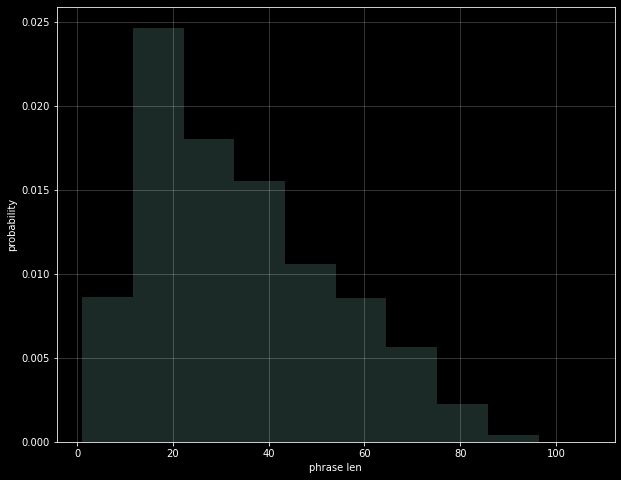

In [6]:
phrase_len = X_train.apply(lambda p: len(p.split(' ')))
max_phrase_len = phrase_len.max()
print('max phrase len: {0}'.format(max_phrase_len))
plt.figure(figsize = (10, 8))
plt.hist(phrase_len, alpha = 0.2, density = True)
plt.xlabel('phrase len')
plt.ylabel('probability')
plt.grid(alpha = 0.25)

In [7]:
y_train = df['sentiment'].values

In [8]:
train_labels=[]
for i in range(0,len(y_train)):
    train_labels.append([0,0])

In [9]:
for i in range(0,len(y_train)):
    if y_train[i] == 0:
        train_labels[i][0]=1
    else:
        train_labels[i][1]=1

In [10]:
train_labels=np.array(train_labels)

In [11]:
import pickle
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [12]:
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen = max_phrase_len)

In [13]:
print(X_train[0])
print(train_labels[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0 1525 4426
    3    7 1739 1892  859   26   54   44   19   29    6 1897  105  121
   25   61 1897    4 2349 2142   26   78  898  515 1391    3 5553 2373
 4166 3867   26    2   42   50  131  742 2429  137   10  484  334  487
  352   58 1645 1187 2043  378    3   73  781]
[0 1]


In [14]:
from tensorflow import keras
model = keras.models.load_model('./Model/')

2022-02-06 09:59:53.544384: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


2022-02-06 09:59:53.550819: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-06 09:59:53.551478: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-06 09:59:53.552858: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-06 09:59:53.553439: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [ ]:
model.evaluate(X_train, train_labels)

2022-02-06 09:59:55.345798: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


10335/12500 [=======================>......] - ETA: 47s - loss: 0.2210 - accuracy: 0.9177

In [ ]:
model.save("./Model92/")